In [1]:
import pickle

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [33]:
with open("advance_times_and_cpu_temperatures_1647803158.pkl", "rb") as f:
    data = pickle.load(f)
times = np.array(data["advance_times"])
temperatures = np.array(data["cpu_temperatures"])

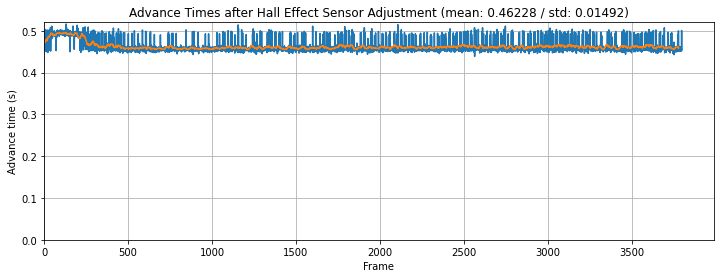

In [43]:
plt.figure(figsize=(12,4))
plt.plot(times)
plt.plot(np.convolve(times, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {times.mean():.5f} / std: {times.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

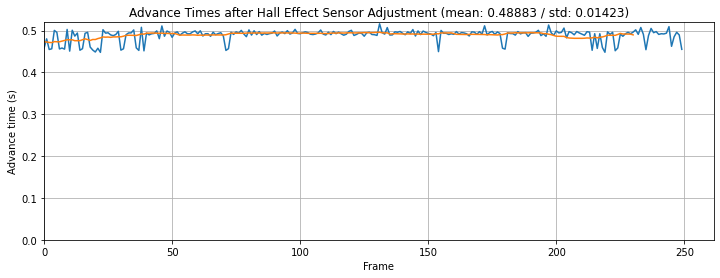

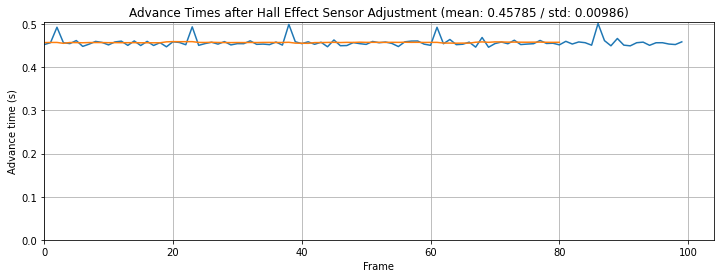

In [47]:
timesearly = times[:250]

plt.figure(figsize=(12,4))
plt.plot(timesearly)
plt.plot(np.convolve(timesearly, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {timesearly.mean():.5f} / std: {timesearly.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

times500 = times[500:600]

plt.figure(figsize=(12,4))
plt.plot(times500)
plt.plot(np.convolve(times500, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {times500.mean():.5f} / std: {times500.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

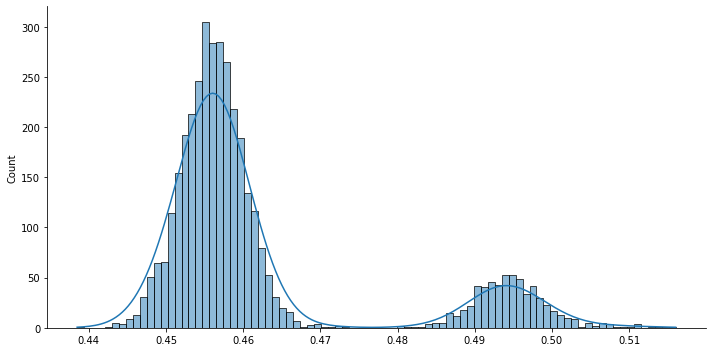

In [5]:
sns.displot(times, kde=True, aspect=2)
plt.show()

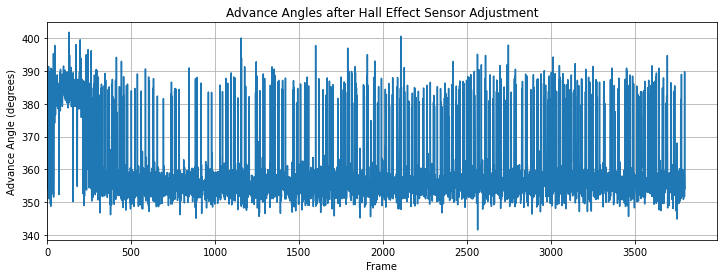

In [8]:
angles = times * 360 / times.mean()

plt.figure(figsize=(12,4))
plt.plot(angles)
plt.grid()
plt.title("Advance Angles after Hall Effect Sensor Adjustment")
plt.xlabel("Frame")
plt.ylabel("Advance Angle (degrees)")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

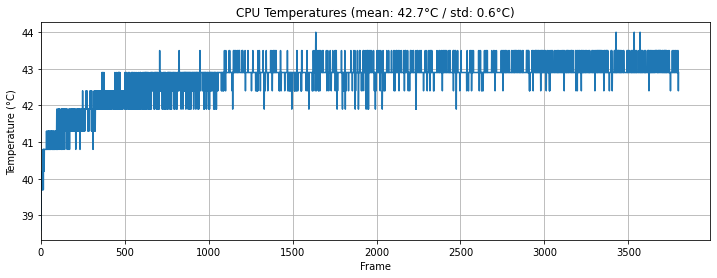

In [37]:
plt.figure(figsize=(12,4))
plt.plot(temperatures)
plt.grid()
plt.title(f"CPU Temperatures (mean: {temperatures.mean():.1f}°C / std: {temperatures.std():.1f}°C)")
plt.xlabel("Frame")
plt.ylabel("Temperature (°C)")
plt.xlim(0, None)
plt.show()

100%|██████████| 3800/3800 [00:12<00:00, 302.99it/s]


[0 1 2 4 5]


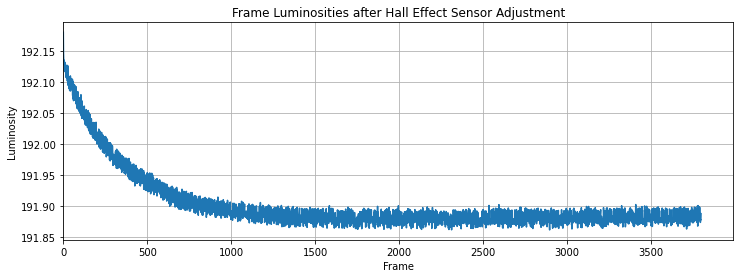

In [9]:
luminosities = []
for i in tqdm(range(3800)):
    path = f"/Volumes/PortableSSD/testhalladjustcase3/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    l = img.mean()
    luminosities.append(l)
luminosities = np.array(luminosities)

medlum = np.median(luminosities)
diffs = np.abs(luminosities - medlum)

ind = np.argpartition(diffs, -5)[-5:]
print(np.sort(ind))

plt.figure(figsize=(12,4))
plt.plot(luminosities)
plt.grid()
plt.title("Frame Luminosities after Hall Effect Sensor Adjustment")
plt.xlabel("Frame")
plt.ylabel("Luminosity")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

In [48]:
imgs = []
for i in tqdm(range(3800)):
    path = f"/Volumes/PortableSSD/testhalladjustcase3/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    imgs.append(img)
imgs = np.array(imgs)

100%|██████████| 3800/3800 [04:46<00:00, 13.24it/s]


KeyboardInterrupt: 

In [23]:
min_img = imgs.min(axis=0)
median_img = np.median(imgs, axis=0)
max_img = imgs.max(axis=0)

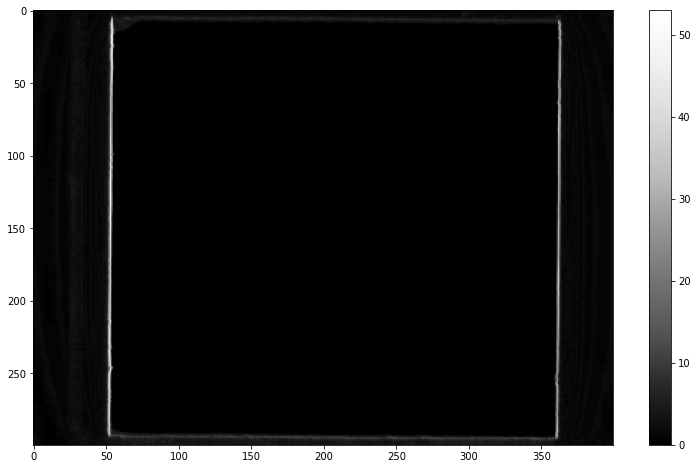

In [28]:
plt.figure(figsize=(13,8))
plt.imshow(max_img-median_img, cmap="Greys_r")
plt.colorbar()
plt.show()

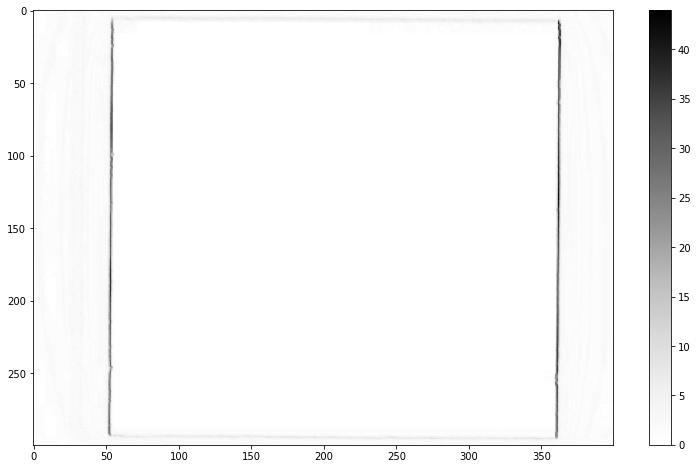

In [30]:
plt.figure(figsize=(13,8))
plt.imshow(median_img-min_img, cmap="Greys")
plt.colorbar()
plt.show()

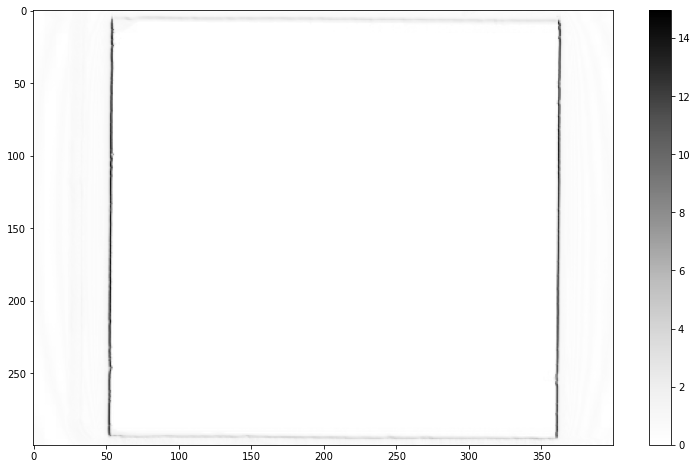

In [31]:
img_std = imgs.std(axis=0)

plt.figure(figsize=(13,8))
plt.imshow(img_std, cmap="Greys")
plt.colorbar()
plt.show()

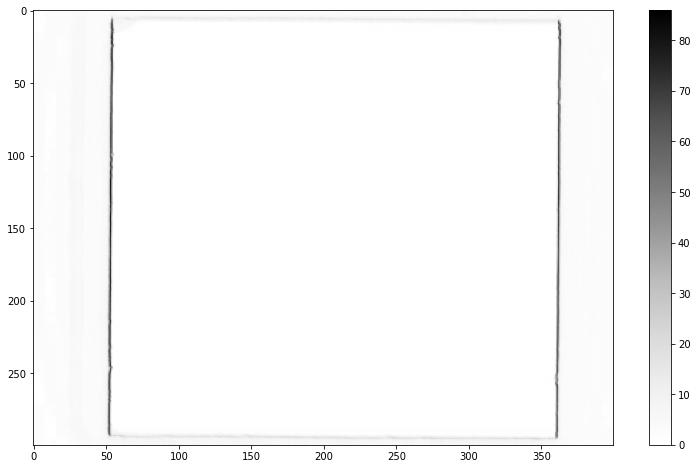

In [32]:
img_diff = np.abs(max_img - min_img)

plt.figure(figsize=(13,8))
plt.imshow(img_diff, cmap="Greys")
plt.colorbar()
plt.show()

In [2]:
from scipy import ndimage

100%|██████████| 3800/3800 [07:04<00:00,  8.95it/s]


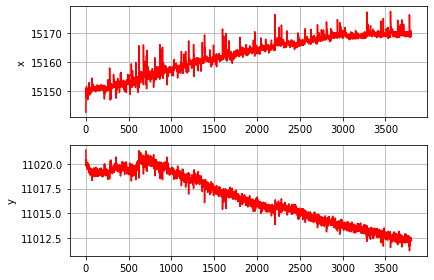

In [3]:
coms = []
for i in tqdm(range(3800)):
    path = f"testhalladjustcase3-1000/lr_export/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    com = ndimage.center_of_mass(img)
    coms.append(com)
coms = np.array(coms)

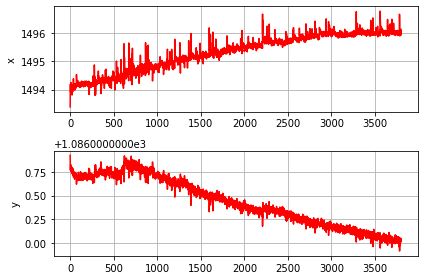

In [4]:
plt.subplot(2, 1, 1)
plt.ylabel("x")
plt.plot(coms[:,1], c="red")
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel("y")
plt.plot(coms[:,0], c="red")
plt.grid()
plt.tight_layout()
plt.show()